In [1]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
%matplotlib inline
import urllib2
import numpy as np
import matplotlib as mpl
mpl.rcParams['font.size'] = 25
mpl.rc('font',family='Times New Roman')

np.set_printoptions(precision=3, suppress=True)
url = ('https://raw.githubusercontent.com/Upward-Spiral-Science'
       '/data/master/syn-density/output.csv')
data = urllib2.urlopen(url)
csv = np.genfromtxt(data, delimiter=",")[1:]

def check_condition(row):
    if row[3] == 0:
        return False
    return True

a = np.apply_along_axis(check_condition, 1, csv)
a = np.where(a == True)[0]
nonZeroMask = csv[a, :]

synDividedMask = np.divide(nonZeroMask[:,4],nonZeroMask[:,3])
synDividedMask = synDividedMask * (64**3)
accurateDataT = np.vstack((nonZeroMask[:,0],nonZeroMask[:,1],nonZeroMask[:,2],synDividedMask))
accurateData = accurateDataT.T

cleaned = accurateData[accurateData[:,0] >= 409]
cleaned = cleaned[cleaned[:,0] <= 3529]
cleaned = cleaned[cleaned[:,1] >= 1564]
cleaned = cleaned[cleaned[:,1] <= 3124]

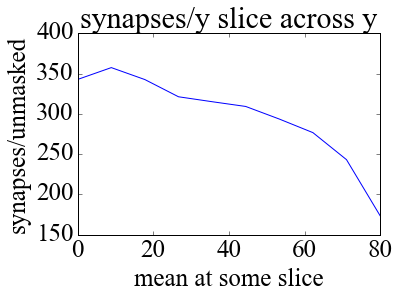

In [8]:
import math

divisionsx = np.unique(cleaned[:,0])
meanx = np.zeros((2,len(divisionsx)))

divisionsy = np.unique(cleaned[:,1])
meany = np.zeros((2,len(divisionsy)))

divisionsz = np.unique(cleaned[:,2])
meanz = np.zeros((2,len(divisionsz)))

maxlen = np.amax([len(divisionsx),len(divisionsy),len(divisionsz)])
xstep = np.divide(maxlen,len(divisionsx))
ystep = 2
zstep = 8

counter = 0
for d in divisionsx:
    slicex = cleaned[cleaned[:,0] == d]
    meanx[0,counter] = (counter)*xstep
    meanx[1,counter] = np.mean(slicex[:,3])
    counter += 1
    
counter = 0
for d in divisionsy:
    slicey = cleaned[cleaned[:,1] == d]
    meany[0,counter] = (counter)*ystep
    meany[1,counter] = np.mean(slicey[:,3])
    counter += 1
    
counter = 0
for d in divisionsz:
    slicez = cleaned[cleaned[:,2] == d]
    meanz[0,counter] = (counter)*zstep
    meanz[1,counter] = np.mean(slicez[:,3])
    counter += 1
    
import time
from scipy.interpolate import UnivariateSpline

spl = UnivariateSpline(meany[0,:], meany[1,:])
xs = np.linspace(min(meany[0,:]), max(meany[0,:]), 10)
plt.plot(xs, spl(xs))
plt.title('synapses/y slice across y')
plt.ylabel('synapses/unmasked')
plt.xlabel('mean at some slice')
plt.xticks([0,20,40,60,80])
plt.subplots_adjust(left = 0.2)
plt.subplots_adjust(bottom = 0.2)
plt.savefig('Fig8a.pdf', format='pdf', dpi=1000)

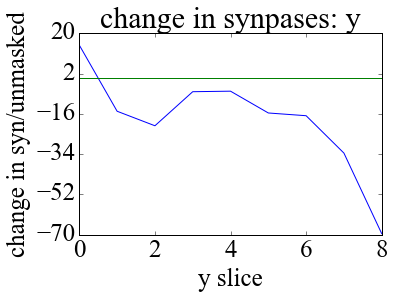

In [9]:
mean = spl(xs)
mean1 = mean[:-1]
mean2 = mean[1:]
meandiff = mean2 - mean1
fig,ax = plt.subplots()
ax.plot(meandiff)
ax.plot([0] * len(meandiff))
ax.set_title('change in synpases: y')
ax.set_xlabel('y slice')
ax.set_ylabel('change in syn/unmasked')
ax.set_xticks([0,2,4,6,8])
ax.set_yticks([-70,-52,-34,-16,2,20])
plt.subplots_adjust(left = 0.2)
plt.subplots_adjust(bottom = 0.2)
plt.savefig('Fig8b.pdf', format='pdf', dpi=1000)
plt.show()